In [2]:
import pandas as pd

data = pd.read_csv('data_clean.csv')
data.head()

,Unnamed: 0,id_transaksi,kategori,kota,harga,jumlah,rating,komentar,weekday_number,weekday_or_weekend,year,month,day
0,0,1,pakaian,Jember,174836,14,2.000000,barang rusak,0,0,2025,11,10
1,1,2,makanan,Jakarta,143087,16,2.990336,layanan oke,6,1,2024,5,19
2,2,3,aksesoris,Jember,182384,11,5.000000,layanan oke,1,0,2024,2,20
3,3,4,pakaian,Surabaya,226151,10,5.000000,produk bagus,5,0,2024,11,2
4,4,5,perabot,Bandung,138292,17,4.000000,packing jelek,2,0,2024,10,2


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['kategori', 'kota']

for i in columns:
    data[i] = le.fit_transform(data[i])

data.head()

,Unnamed: 0,id_transaksi,kategori,kota,harga,jumlah,rating,komentar,weekday_number,weekday_or_weekend,year,month,day
0,0,1,4,3,174836,14,2.000000,barang rusak,0,0,2025,11,10
1,1,2,2,2,143087,16,2.990336,layanan oke,6,1,2024,5,19
2,2,3,0,3,182384,11,5.000000,layanan oke,1,0,2024,2,20
3,3,4,4,5,226151,10,5.000000,produk bagus,5,0,2024,11,2
4,4,5,5,0,138292,17,4.000000,packing jelek,2,0,2024,10,2


In [4]:
data['rating']= data['rating'].round(0).astype(int)
data.head()

,Unnamed: 0,id_transaksi,kategori,kota,harga,jumlah,rating,komentar,weekday_number,weekday_or_weekend,year,month,day
0,0,1,4,3,174836,14,2,barang rusak,0,0,2025,11,10
1,1,2,2,2,143087,16,3,layanan oke,6,1,2024,5,19
2,2,3,0,3,182384,11,5,layanan oke,1,0,2024,2,20
3,3,4,4,5,226151,10,5,produk bagus,5,0,2024,11,2
4,4,5,5,0,138292,17,4,packing jelek,2,0,2024,10,2


In [5]:
data['rating'].astype(int)
def konversi_rating(x):
    if x == 1:
        return 'Sangat Buruk'
    elif x == 2:
        return 'Buruk'
    elif x == 3:
        return 'Cukup'
    elif x == 4:
        return 'Baik'
    elif x == 5:
        return 'Sangat Baik'

data['rating'] = data['rating'].apply(konversi_rating)
data

,Unnamed: 0,id_transaksi,kategori,kota,harga,jumlah,rating,komentar,weekday_number,weekday_or_weekend,year,month,day
0,0,1,4,3,174836,14,Buruk,barang rusak,0,0,2025,11,10
1,1,2,2,2,143087,16,Cukup,layanan oke,6,1,2024,5,19
2,2,3,0,3,182384,11,Sangat Baik,layanan oke,1,0,2024,2,20
3,3,4,4,5,226151,10,Sangat Baik,produk bagus,5,0,2024,11,2
4,4,5,5,0,138292,17,Baik,packing jelek,2,0,2024,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2996,5,4,153874,18,Cukup,packing jelek,1,0,2024,10,15
2996,2996,2997,5,3,162888,9,Cukup,produk bagus,0,0,2025,6,9
2997,2997,2998,1,1,87912,12,Cukup,packing jelek,3,0,2025,11,13
2998,2998,2999,5,1,166709,11,Sangat Baik,barang rusak,2,0,2025,6,11


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X = data[['kategori', 'kota', 'harga', 'jumlah']]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
parameters= {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=parameters,
    n_jobs = 1,
    verbose = 1,
    scoring='f1_macro'
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'f1_macro'
,n_jobs,1
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [7]:
best_model = grid_search.best_estimator_

print(f'Best param : {grid_search.best_params_}')
print(f'Best train score: {grid_search.best_score_}')

Best param : {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best train score: 0.21921930533528364


In [8]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Baik       0.14      0.16      0.15       129
       Buruk       0.19      0.18      0.19       145
       Cukup       0.45      0.46      0.45       371
 Sangat Baik       0.20      0.16      0.18       139
Sangat Buruk       0.11      0.14      0.12       116

    accuracy                           0.28       900
   macro avg       0.22      0.22      0.22       900
weighted avg       0.28      0.28      0.28       900



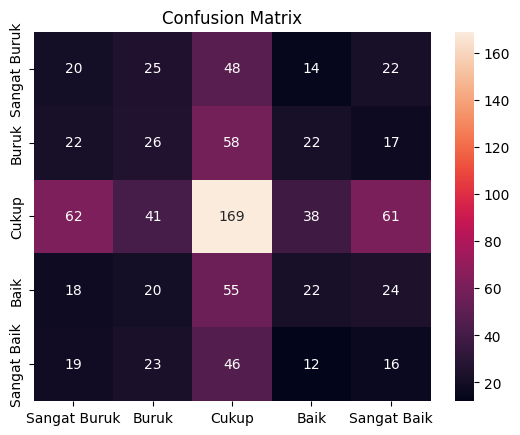

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'], 
            yticklabels=['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'])
plt.title('Confusion Matrix')
plt.show()

In [10]:
rating_tinggi = ['Baik', 'Sangat Baik']
rating_rendah = ['Sangat Buruk', 'Buruk']

data['label_rating'] = data['rating'].apply(
    lambda x: 'tinggi' if x in rating_tinggi else 
              'rendah' if x in rating_rendah else 'netral'
)

insight = pd.crosstab(data['kategori'], data['label_rating'], normalize='index') * 100

print(insight)

label_rating     netral     rendah     tinggi
kategori                                     
0             40.540541  27.027027  32.432432
1             44.558522  26.078029  29.363450
2             41.364606  29.211087  29.424307
3             40.550459  31.376147  28.073394
4             43.711340  30.103093  26.185567
5             39.919355  31.653226  28.427419
